# Native R Modeling

This notebook demonstrates how an R programmer can interact with data in CAS - running CAS actions in memory throught SWAT (SAS' Scripting Wrapper for Analytics Transfer), pulling data into R for execution of native packages, and publishing results back to CAS for use with other SAS Viya interfaces.

### Load SWAT and Other R Libraries; Connect CAS Session

In [1]:
library(swat)
library(ROCR)
library(pROC)
library(ggplot2)
library(dplyr)
conn <- CAS("ip-10-249-7-213.ec2.internal", 5570, user="anddwi",password="Orion123")

SWAT 1.4.0
Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following object is masked from ‘package:swat’:

    cov

The following objects are masked from ‘package:stats’:

    cov, smooth, var


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

NOTE: Connecting to CAS and generating CAS action functions for loaded
      action sets...
NOTE: To generate the functions with signatures (for tab completion), set 
      options(cas.gen.function.sig=TRUE).


### Store CASLIB Information in an R Variable

In [3]:
cas.sessionProp.setSessOpt(conn,caslib='PUBLIC')
currentCaslib <- 'PUBLIC'

NOTE: 'Public' is now the active caslib.


list()

### SWAT Functions for Table Information

In [4]:
cas.table.tableInfo(conn,caslib=currentCaslib)

Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,⋯,Global,Repeated,View,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
READMISSIONS_FINAL,75675,40,0,utf-8,2019-01-14T08:55:50-05:00,2019-01-14T08:55:50-05:00,2019-01-14T08:55:50-05:00,UTF8,1863093350,⋯,1,0,0,READMISSIONS_FINAL.sashdat,Public,0,anddwi,,2019-01-09T14:33:56-05:00,1862681636
READMISSIONS_RAW,75675,40,0,utf-8,2019-01-14T08:55:59-05:00,2019-01-14T08:55:59-05:00,2019-01-14T08:58:11-05:00,UTF8,1863093359,⋯,1,0,0,READMISSIONS_RAW.sashdat,Public,0,anddwi,,2019-01-10T08:55:01-05:00,1862747701
READMISSIONSSCORED_1,75675,40,0,utf-8,2019-01-14T08:58:10-05:00,2019-01-14T08:58:10-05:00,2019-01-14T08:58:10-05:00,UTF8,1863093490,⋯,1,0,0,,,0,anddwi,,,NaN
READMISSIONSSCORED_2,75675,40,0,utf-8,2019-01-14T08:58:11-05:00,2019-01-14T08:58:11-05:00,2019-01-14T08:58:11-05:00,UTF8,1863093491,⋯,1,0,0,,,0,anddwi,,,NaN
READMISSIONSSCORED_3,75675,40,0,utf-8,2019-01-14T08:58:11-05:00,2019-01-14T08:58:11-05:00,2019-01-14T08:58:11-05:00,UTF8,1863093491,⋯,1,0,0,,,0,anddwi,,,NaN
READMISSIONSSCORED_4,75675,40,0,utf-8,2019-01-14T08:58:11-05:00,2019-01-14T08:58:11-05:00,2019-01-14T08:58:11-05:00,UTF8,1863093491,⋯,1,0,0,,,0,anddwi,,,NaN


In [5]:
rawdata <- defCasTable(conn,caslib=currentCaslib,"READMISSIONS_RAW")
head(rawdata)

City_Lat,City_Long,Hospital_LAT,Hospital_LONG,Hospital_Name,Hospital_State,diagnosis,Patient_Number,DV_Readmit_Flag,Admit_Date,⋯,CITY,STATE,Postcode,address,PatientID,Patient_LON,Patient_LAT,Contact_Preference,Email,Phone
28.02194,-81.73307,28.02194,-81.73307,WINTER HAVEN HOSPITAL,FL,COPD,3616875575,0,20328,⋯,WINTER HAVEN,FL,33880,3710 IMPERIAL DR,3616875575,-81.78762,27.99263,email,3616875575@WINTER HAVEN HOSPITAL.com,(099)431-5552
28.02194,-81.73307,28.02194,-81.73307,WINTER HAVEN HOSPITAL,FL,COPD,3641618231,1,19561,⋯,WINTER HAVEN,FL,33880,3550 US HIGHWAY 17,3641618231,-81.73206,28.05979,phone,3641618231@WINTER HAVEN HOSPITAL.com,(034)373-8870
28.02194,-81.73307,28.02194,-81.73307,WINTER HAVEN HOSPITAL,FL,COPD,3921618827,0,20460,⋯,WINTER HAVEN,FL,33880,1460 NW 36TH ST,3921618827,-81.76975,28.03913,email,3921618827@WINTER HAVEN HOSPITAL.com,(519)121-6393
28.02194,-81.73307,28.02194,-81.73307,WINTER HAVEN HOSPITAL,FL,COPD,3974421613,1,20189,⋯,WINTER HAVEN,FL,33880,815 INDIAN BLF,3974421613,-81.82273,28.01230,phone,3974421613@WINTER HAVEN HOSPITAL.com,(740)476-7728
28.02194,-81.73307,28.02194,-81.73307,WINTER HAVEN HOSPITAL,FL,COPD,4175390240,0,20508,⋯,WINTER HAVEN,FL,33880,405 AVENUE B E,4175390240,-81.72135,27.95242,text,4175390240@WINTER HAVEN HOSPITAL.com,(821)257-2454
28.02194,-81.73307,28.02194,-81.73307,WINTER HAVEN HOSPITAL,FL,COPD,4229141448,0,20184,⋯,WINTER HAVEN,FL,33880,520 NW LEE AVE,4229141448,-81.73193,28.03380,email,4229141448@WINTER HAVEN HOSPITAL.com,(909)514-7356


In [6]:
target <- 'DV_Readmit_Flag'

### Use the CAS action for stratified sampling to create a partition variable with data staying in memory.

In [7]:
loadActionSet(conn, 'sampling')
cas.sampling.stratified(conn,
                       table = list(name='READMISSIONS_RAW', groupBy=target),
                       seed = 20, 
                       samppct = 30,
                       partInd = TRUE,
                       output = list(casOut = list(name = 'READMISSIONS_PART', replace = T), copyVars = 'ALL'))

NOTE: Added action set 'sampling'.
NOTE: Information for action set 'sampling':
NOTE:    sampling
NOTE:       srs -  Samples a proportion of data from the input table or partitions the data into no more than three portions
NOTE:       stratified - Samples a proportion of data or partitions the data into no more than three portions within each stratum
NOTE:       oversample - Samples a user-specified proportion of data from the event level and adjusts the ratio between rare events and non-rare events to a user-specified ratio
NOTE:       kfold - K-fold partitioning.
NOTE: Using SEED=20 for sampling.


$outputSize
$outputSize$outputNObs
[1] 75675

$outputSize$outputNVars
[1] 41


$STRAFreq
  ByGrpID DV_Readmit_Flag  NObs NSamp
1       0               0 58668 17600
2       1               1 17007  5102

$OutputCasTables
  casLib              Name Label  Rows Columns
1 Public READMISSIONS_PART       75675      41

In [8]:
train <- defCasTable(conn,caslib=currentCaslib, 'READMISSIONS_PART', where="_PartInd_=0")
valid <- defCasTable(conn,caslib=currentCaslib, 'READMISSIONS_PART', where="_PartInd_=1")
head(train)

City_Lat,City_Long,Hospital_LAT,Hospital_LONG,Hospital_Name,Hospital_State,diagnosis,Patient_Number,DV_Readmit_Flag,Admit_Date,⋯,STATE,Postcode,address,PatientID,Patient_LON,Patient_LAT,Contact_Preference,Email,Phone,_PartInd_
39.06389,-108.55,39.06389,-108.55,ST MARYS MEDICAL CENTER,CO,HF,9802327715,0,19715,⋯,CO,81650,334 East 10Th Street,9802327715,-107.7800,39.53890,phone,9802327715@ST MARYS MEDICAL CENTER.com,(263)298-6486,0
39.06389,-108.55,39.06389,-108.55,ST MARYS MEDICAL CENTER,CO,HF,9809808773,1,20191,⋯,CO,81502,902 Main Street,9809808773,-107.6532,39.54733,phone,9809808773@ST MARYS MEDICAL CENTER.com,(512)536-1914,0
39.06389,-108.55,39.06389,-108.55,ST MARYS MEDICAL CENTER,CO,HIP/KNEE,697697439,0,19858,⋯,CO,81502,902 Main Street,697697439,-107.6532,39.54733,email,697697439@ST MARYS MEDICAL CENTER.com,(745)538-2865,0
39.06389,-108.55,39.06389,-108.55,ST MARYS MEDICAL CENTER,CO,HIP/KNEE,752767441,0,20625,⋯,CO,81502,902 Main Street,752767441,-107.6532,39.54733,text,752767441@ST MARYS MEDICAL CENTER.com,(852)700-1549,0
39.06389,-108.55,39.06389,-108.55,ST MARYS MEDICAL CENTER,CO,HIP/KNEE,1181886062,0,19752,⋯,CO,81502,902 Main Street,1181886062,-107.6532,39.54733,phone,1181886062@ST MARYS MEDICAL CENTER.com,(533)372-1725,0
39.06389,-108.55,39.06389,-108.55,ST MARYS MEDICAL CENTER,CO,HIP/KNEE,1530054142,1,20573,⋯,CO,81502,902 Main Street,1530054142,-107.6532,39.54733,text,1530054142@ST MARYS MEDICAL CENTER.com,(167)399-2541,0


### Transfer training data from CAS table to R data frame

In [9]:
train_R <- to.data.frame(to.casDataFrame(train))

### Build logistic regression with native R and summarize

In [10]:
R_logistic <- glm(DV_Readmit_Flag ~ bmi + Length_of_Stay + Chronic_Conditions_Number + Patient_Age, family= binomial(link=logit), data= train_R)

In [11]:
summary(R_logistic)


Call:
glm(formula = DV_Readmit_Flag ~ bmi + Length_of_Stay + Chronic_Conditions_Number + 
    Patient_Age, family = binomial(link = logit), data = train_R)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8388  -0.4364  -0.2172  -0.0648   3.9433  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -13.822658   0.220555 -62.672  < 2e-16 ***
bmi                         0.005690   0.005495   1.035      0.3    
Length_of_Stay              0.469096   0.008710  53.858  < 2e-16 ***
Chronic_Conditions_Number   0.236517   0.036538   6.473 9.59e-11 ***
Patient_Age                 0.151795   0.002102  72.226  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 34848  on 32767  degrees of freedom
Residual deviance: 18015  on 32763  degrees of freedom
AIC: 18025

Number of Fisher Scoring iterations: 6


### Transfer validation data from CAS to R data frame

In [12]:
valid_R <- to.data.frame(to.casDataFrame(valid))

### Score validation data, add predicted probability as new column

In [13]:
predict_valid_logistic <- predict(R_logistic, valid_R, type="response")

In [14]:
head(predict_valid_logistic)

1           2           3           4           5           6 
0.387478898 0.170531253 0.019744573 0.004841679 0.059246065 0.036279573

In [15]:
validScore <- cbind(valid_R,prob = predict_valid_logistic)

In [16]:
head(validScore)

City_Lat,City_Long,Hospital_LAT,Hospital_LONG,Hospital_Name,Hospital_State,diagnosis,Patient_Number,DV_Readmit_Flag,Admit_Date,⋯,Postcode,address,PatientID,Patient_LON,Patient_LAT,Contact_Preference,Email,Phone,_PartInd_,prob
39.06389,-108.55,39.06389,-108.55,ST MARYS MEDICAL CENTER,CO,HIP/KNEE,661862698,1,19892,⋯,81502,902 Main Street,661862698,-107.6532,39.54733,phone,661862698@ST MARYS MEDICAL CENTER.com,(174)121-1629,1,0.387478898
39.06389,-108.55,39.06389,-108.55,ST MARYS MEDICAL CENTER,CO,HIP/KNEE,1377460329,0,19634,⋯,81502,902 Main Street,1377460329,-107.6532,39.54733,phone,1377460329@ST MARYS MEDICAL CENTER.com,(293)740-3563,1,0.170531253
39.06389,-108.55,39.06389,-108.55,ST MARYS MEDICAL CENTER,CO,HIP/KNEE,1519256663,0,19847,⋯,81502,902 Main Street,1519256663,-107.6532,39.54733,email,1519256663@ST MARYS MEDICAL CENTER.com,(226)739-3244,1,0.019744573
39.06389,-108.55,39.06389,-108.55,ST MARYS MEDICAL CENTER,CO,HIP/KNEE,1761808596,0,20194,⋯,81502,902 Main Street,1761808596,-107.6532,39.54733,email,1761808596@ST MARYS MEDICAL CENTER.com,(858)480-4023,1,0.004841679
39.06389,-108.55,39.06389,-108.55,ST MARYS MEDICAL CENTER,CO,HIP/KNEE,2385003288,0,20281,⋯,81502,902 Main Street,2385003288,-107.6532,39.54733,email,2385003288@ST MARYS MEDICAL CENTER.com,(877)506-5813,1,0.059246065
39.06389,-108.55,39.06389,-108.55,ST MARYS MEDICAL CENTER,CO,HIP/KNEE,4956790681,0,19696,⋯,81502,902 Main Street,4956790681,-107.6532,39.54733,email,4956790681@ST MARYS MEDICAL CENTER.com,(810)767-1909,1,0.036279573


### Validation Confusion Matrix and ROC Curve

In [17]:
table(validScore$DV_Readmit_Flag, predict_valid_logistic > 0.5)

   
    FALSE  TRUE
  0 16930   670
  1  1788  3314

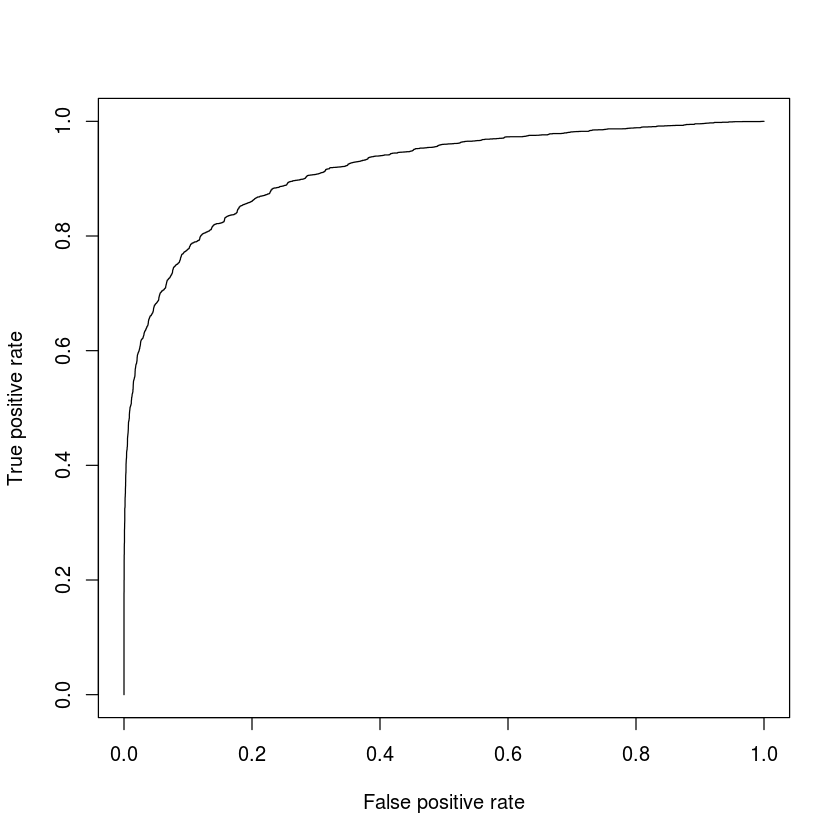

In [18]:
ROCRpred <- prediction(predict_valid_logistic, validScore$DV_Readmit_Flag)
ROCRperf <- performance(ROCRpred, 'tpr','fpr')
plot(ROCRperf, text.adj = c(-0.2,1.7))

In [19]:
#move to CAS
validScoredCAS <- as.casTable(conn, validScore, casOut=list(name="validScoredLogisticR", caslib="PUBLIC", promote=TRUE))
predict_train_logistic <- predict(R_logistic, train_R, type="response")
trainScore <- cbind(train_R,prob = predict_train_logistic)
trainScoredCAS <- as.casTable(conn, trainScore, casOut=list(name="trainScoredLogisticR", caslib="PUBLIC", promote=TRUE))

### Score 4 quarters of data in R and load back to CAS to be used for model performance monitoring

In [20]:
score1 <- to.data.frame(to.casDataFrame(defCasTable(conn,caslib=currentCaslib, 'READMISSIONSSCORED_1')))

In [21]:
predictLogistic1 <- predict(R_logistic, score1, type="response")
scoredLogisticR1 <- cbind(score1, prob = predictLogistic1)
scoredLogisticR1 <- scoredLogisticR1 %>%
    mutate(pred=ifelse(prob < 0.5, 0, 1))

In [22]:
scoredCAS1 <- as.casTable(conn, scoredLogisticR1, casOut=list(name="scoredLogisticR_1_Q1_a1638c70-8ee0-4d2b-9892-c7f892e63f2c", caslib="PUBLIC", promote=TRUE))

In [23]:
score2 <- to.data.frame(to.casDataFrame(defCasTable(conn,caslib=currentCaslib, 'READMISSIONSSCORED_2')))

In [24]:
predictLogistic2 <- predict(R_logistic, score2, type="response")
scoredLogisticR2 <- cbind(score2, prob = predictLogistic2)
scoredLogisticR2 <- scoredLogisticR2 %>%
    mutate(pred=ifelse(prob < 0.5, 0, 1))

In [25]:
scoredCAS2 <- as.casTable(conn, scoredLogisticR2, casOut=list(name="scoredLogisticR_2_Q2_a1638c70-8ee0-4d2b-9892-c7f892e63f2c", caslib="PUBLIC", promote=TRUE))

In [26]:
score3 <- to.data.frame(to.casDataFrame(defCasTable(conn,caslib=currentCaslib, 'READMISSIONSSCORED_3')))

In [27]:
predictLogistic3 <- predict(R_logistic, score3, type="response")
scoredLogisticR3 <- cbind(score3, prob = predictLogistic3)
scoredLogisticR3 <- scoredLogisticR3 %>%
    mutate(pred=ifelse(prob < 0.5, 0, 1))

In [28]:
scoredCAS3 <- as.casTable(conn, scoredLogisticR3, casOut=list(name="scoredLogisticR_3_Q3_a1638c70-8ee0-4d2b-9892-c7f892e63f2c", caslib="PUBLIC", promote=TRUE))

In [29]:
score4 <- to.data.frame(to.casDataFrame(defCasTable(conn,caslib=currentCaslib, 'READMISSIONSSCORED_4')))

In [30]:
predictLogistic4 <- predict(R_logistic, score4, type="response")
scoredLogisticR4 <- cbind(score4, prob = predictLogistic4)
scoredLogisticR4 <- scoredLogisticR4 %>%
    mutate(pred=ifelse(prob < 0.5, 0, 1))

In [31]:
scoredCAS4 <- as.casTable(conn, scoredLogisticR4, casOut=list(name="scoredLogisticR_4_Q4_a1638c70-8ee0-4d2b-9892-c7f892e63f2c", caslib="PUBLIC", promote=TRUE))

### End the CAS session

In [32]:
cas.session.endSession(conn)